In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


In [72]:
creditTrain=pd.read_csv("fraudTrain.csv")
creditTest=pd.read_csv("fraudTest.csv")

In [73]:
credit_card=pd.concat([creditTrain,creditTest],axis=0)

In [74]:
credit_card.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [75]:
credit_card.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [76]:
credit_card.shape

(1852394, 23)

In [77]:
credit_card.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [78]:
credit_card['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [79]:
creditTest.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [80]:
legit=credit_card[credit_card.is_fraud==0]
fraud=credit_card[credit_card.is_fraud==1]

In [81]:
print(legit.shape)
print(fraud.shape)

(1842743, 23)
(9651, 23)


In [82]:
legit_sample=legit.sample(n=9651)
print(legit_sample.shape)

(9651, 23)


In [83]:
new_df=pd.concat([legit_sample,fraud],axis=0)

In [84]:
new_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
297886,297886,2020-10-11 20:44:05,371226440126102,fraud_Schoen Ltd,kids_pets,12.45,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,...,38.9311,-89.2463,1810,Race relations officer,1974-12-24,80b3ed1182d2382a2da71f217e099b37,1381524245,38.992197,-88.716304,0
141062,141062,2020-08-09 20:28:18,2720433095629877,fraud_Kub PLC,personal_care,59.70,Mark,Wood,M,854 Walker Dale Suite 488,...,44.0575,-69.9656,3224,"Engineer, electronics",1997-08-22,45c1ae4852b8f81ca2541023b2066149,1376080098,43.138013,-70.499311,0
472427,472427,2020-12-13 20:19:01,30376238035123,"fraud_McLaughlin, Armstrong and Koepp",travel,3.09,Cynthia,Davis,F,7177 Steven Forges,...,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,529a8cbfc2c744a954790995a1a85212,1386965941,41.833756,-124.054820,0
482616,482616,2020-12-15 13:25:09,3525590521269779,"fraud_Schroeder, Wolff and Hermiston",travel,6.06,Scott,Fuller,M,861 Karen Common,...,36.0424,-79.3242,6006,Paramedic,1984-07-20,69af5b353855bab745e39b81e35be82f,1387113909,35.408171,-79.839667,0
1132716,1132716,2020-04-16 21:35:00,38295635583927,fraud_Ankunding LLC,shopping_net,8.63,Candice,Brown,F,9412 Harris Mews,...,33.3749,-99.8473,178,Warden/ranger,1983-06-14,1f34ca1dad18d137ca6ee5d354814ce4,1366148100,33.748661,-100.630282,0


In [85]:
new_df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1
517571,517571,2020-12-22 23:13:39,2242176657877538,fraud_Jaskolski-Vandervort,misc_net,766.38,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,44292cbc51e37dc018ee6a988a4bc426,1387754019,33.771462,-90.651342,1


In [86]:
new_df['is_fraud'].value_counts()

is_fraud
0    9651
1    9651
Name: count, dtype: int64

In [87]:
new_df.drop(['lat','long','merch_lat','merch_long','gender','street','first','last','job','dob'],axis=1 , inplace=True)

In [88]:
new_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,city,state,zip,city_pop,trans_num,unix_time,is_fraud
297886,297886,2020-10-11 20:44:05,371226440126102,fraud_Schoen Ltd,kids_pets,12.45,Mulberry Grove,IL,62262,1810,80b3ed1182d2382a2da71f217e099b37,1381524245,0
141062,141062,2020-08-09 20:28:18,2720433095629877,fraud_Kub PLC,personal_care,59.70,Bowdoin,ME,4287,3224,45c1ae4852b8f81ca2541023b2066149,1376080098,0
472427,472427,2020-12-13 20:19:01,30376238035123,"fraud_McLaughlin, Armstrong and Koepp",travel,3.09,Sixes,OR,97476,217,529a8cbfc2c744a954790995a1a85212,1386965941,0
482616,482616,2020-12-15 13:25:09,3525590521269779,"fraud_Schroeder, Wolff and Hermiston",travel,6.06,Haw River,NC,27258,6006,69af5b353855bab745e39b81e35be82f,1387113909,0
1132716,1132716,2020-04-16 21:35:00,38295635583927,fraud_Ankunding LLC,shopping_net,8.63,O Brien,TX,79539,178,1f34ca1dad18d137ca6ee5d354814ce4,1366148100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Senatobia,MS,38668,14462,35b0297dd026d2e9a75d024a5dec7955,1387749948,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Senatobia,MS,38668,14462,da7f67d7375f10a054a3d919448c45dd,1387750687,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Senatobia,MS,38668,14462,25b076c7bcd70f272c1c5326bb234f4b,1387751508,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Senatobia,MS,38668,14462,2df7d894868fbc99ec1d8b055585fc9d,1387753563,1


In [89]:
label =LabelEncoder()
label_encoding1=label.fit_transform(new_df.merchant)
new_df['merchant']=label_encoding1


In [90]:
label_encoding2=label.fit_transform(new_df.category)
new_df['category']=label_encoding2

In [91]:
label_encoding4=label.fit_transform(new_df.city)
new_df['city']=label_encoding4

In [92]:
label_encoding5=label.fit_transform(new_df.state)
new_df['state']=label_encoding5

In [93]:
label_encoding6=label.fit_transform(new_df.trans_date_trans_time)
new_df['trans_date_trans_time']=label_encoding6

In [99]:
label_encoding7=label.fit_transform(new_df.trans_num)
new_df['trans_num']=label_encoding7

In [100]:
new_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,city,state,zip,city_pop,trans_num,unix_time,is_fraud
297886,297886,17188,371226440126102,562,7,12.45,554,14,62262,1810,9658,1381524245,0
141062,141062,15594,2720433095629877,343,10,59.70,85,21,4287,3224,5192,1376080098,0
472427,472427,18774,30376238035123,419,13,3.09,760,37,97476,217,6207,1386965941,0
482616,482616,18857,3525590521269779,568,13,6.06,334,27,27258,6006,7965,1387113909,0
1132716,1132716,12418,38295635583927,8,11,8.63,600,43,79539,178,2301,1366148100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,19084,2242176657877538,670,12,1041.51,750,25,38668,14462,3976,1387749948,1
517274,517274,19085,2242176657877538,349,12,868.09,750,25,38668,14462,16477,1387750687,1
517341,517341,19087,2242176657877538,443,11,1039.42,750,25,38668,14462,2762,1387751508,1
517529,517529,19089,2242176657877538,29,4,289.27,750,25,38668,14462,3354,1387753563,1


In [101]:
x = new_df.drop(columns='is_fraud',axis=1)
y=new_df['is_fraud']

In [102]:
x

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,city,state,zip,city_pop,trans_num,unix_time
297886,297886,17188,371226440126102,562,7,12.45,554,14,62262,1810,9658,1381524245
141062,141062,15594,2720433095629877,343,10,59.70,85,21,4287,3224,5192,1376080098
472427,472427,18774,30376238035123,419,13,3.09,760,37,97476,217,6207,1386965941
482616,482616,18857,3525590521269779,568,13,6.06,334,27,27258,6006,7965,1387113909
1132716,1132716,12418,38295635583927,8,11,8.63,600,43,79539,178,2301,1366148100
...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,19084,2242176657877538,670,12,1041.51,750,25,38668,14462,3976,1387749948
517274,517274,19085,2242176657877538,349,12,868.09,750,25,38668,14462,16477,1387750687
517341,517341,19087,2242176657877538,443,11,1039.42,750,25,38668,14462,2762,1387751508
517529,517529,19089,2242176657877538,29,4,289.27,750,25,38668,14462,3354,1387753563


In [103]:
y

297886     0
141062     0
472427     0
482616     0
1132716    0
          ..
517197     1
517274     1
517341     1
517529     1
517571     1
Name: is_fraud, Length: 19302, dtype: int64

<Axes: >

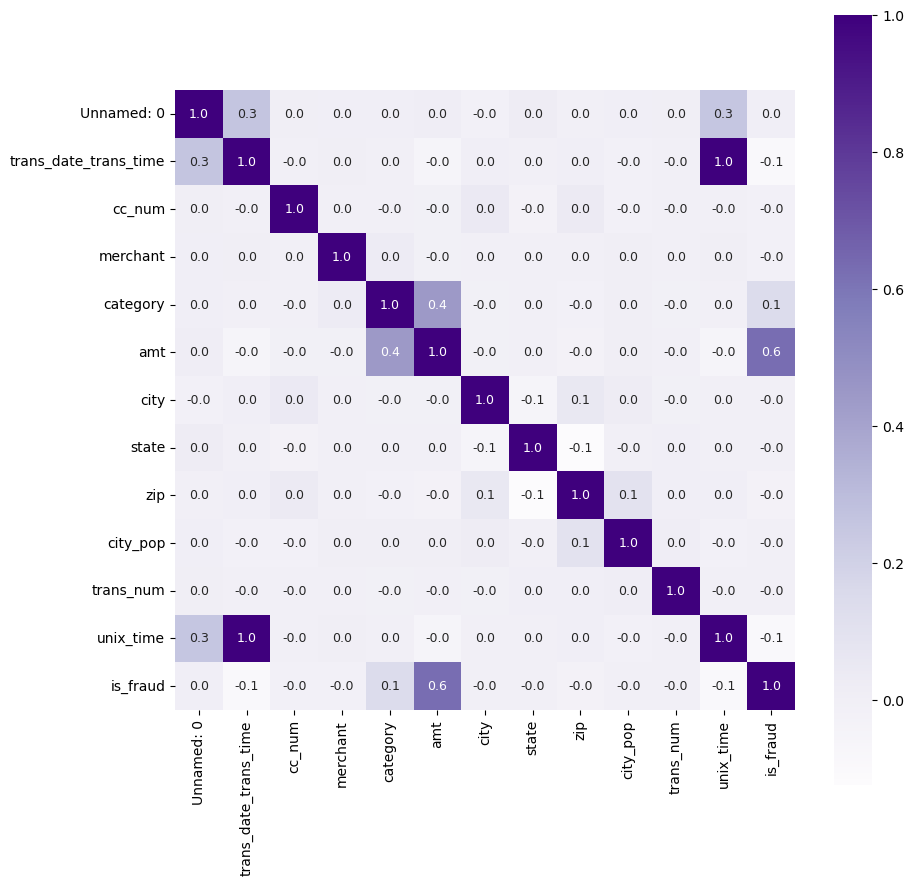

In [105]:
import seaborn as sns
correlation = new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square=True, fmt='.1f', annot=True,annot_kws={'size':9},cmap='Purples')

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [108]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [109]:
x_train

array([[-0.21539124, -0.79822942, -0.31936451, ..., -0.27749863,
         0.69852574, -0.78288336],
       [-0.91544534, -1.27699788, -0.32140605, ..., -0.29347202,
         0.00909164, -1.27643919],
       [-0.48896696,  1.45472436, -0.319734  , ..., -0.2944665 ,
         1.65042201,  1.47567548],
       ...,
       [-0.79782304, -1.18355325, -0.32141092, ..., -0.29328028,
        -0.20654713, -1.18244824],
       [-1.09538572, -1.41878839, -0.32129672, ..., -0.12245764,
         0.40933298, -1.42052404],
       [-0.24831166, -0.81572774, -0.32143362, ..., -0.29767743,
         1.59570501, -0.80297497]])

In [110]:
x_test = sc.fit_transform(x_test)
x_test

array([[-0.80219338,  1.21988651, -0.31426718, ..., -0.29723106,
         1.04920515,  1.20939304],
       [ 0.63427634, -0.17568136, -0.31254419, ..., -0.29436624,
         1.47896708, -0.15689406],
       [-0.23633949,  1.58543044, -0.31065248, ..., -0.2912613 ,
         1.06968712,  1.615513  ],
       ...,
       [ 0.39212513, -0.35294708, -0.31424742, ..., -0.29812571,
         0.42468489, -0.34395449],
       [ 0.09872815, -0.58953819, -0.31093848, ..., -0.28886682,
         0.87025746, -0.56922214],
       [-0.12438688, -0.72346439, -0.3125499 , ..., -0.29094225,
        -0.32632049, -0.7110519 ]])

In [111]:
model =LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
x1= model.predict(x_test)
accuracy_score(y_test,x1)

0.8532205145916076

In [116]:
svm_model = svm.SVC()

In [119]:
svm_model.fit(x_train,y_train)

SVC()

In [120]:
x2 = svm_model.predict(x_test)

In [121]:
accuracy_score(y_test,x2)

0.8615092384734934

In [122]:
Random_Forest = RandomForestClassifier()

In [123]:
Random_Forest.fit(x_train,y_train)

RandomForestClassifier()

In [124]:
x3 = Random_Forest.predict(x_test)

In [125]:
accuracy_score(y_test,x3)

0.9271283025384217

In [127]:
print("Accuracy score found using LogisticRegression - ",accuracy_score(y_test,x1))
print("Accuracy score found using SVM - ",accuracy_score(y_test,x2))
print("Accuracy score found using RandomForestClassifier - ",accuracy_score(y_test,x3))


Accuracy score found using LogisticRegression -  0.8532205145916076
Accuracy score found using SVM -  0.8615092384734934
Accuracy score found using RandomForestClassifier -  0.9271283025384217
